## Bike Share Data 
<p><img style=" float: right ;margin: 5px 20px 5px 1px;" width="300" src="https://i.ibb.co/WxyFB3D/14581469364-fa154367d9-k.jpg"></p>
Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles on a very short-term basis for a price. This allows people to borrow a bike from point A and return it at point B, though they can also return it to the same location if they'd like to just go for a ride. Regardless, each bike can serve several users per day.

Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, I will use data provided by <a href="https://www.motivateco.com/"> Motivate</a>, a bike share system provider for many major cities in the United States, to uncover bike share usage patterns. I will compare the system usage between three large cities: Chicago, New York City, and Washington, DC

In [25]:
# Importing required modules
import time
import pandas as pd
import matplotlib.pyplot as plt
# assign the data to a dict
CITY_DATA = {'chicago': 'chicago.csv',
             'new york city': 'new_york_city.csv',
             'washington': 'washington.csv'}
# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

In [26]:
def get_filters():
    """
    Asks user to specify a city, month, and day to analyze.
    Returns:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    """
    print('Hello! Let\'s explore some US bikeshare data!')
    # get user input for city 
    Cities = ['all','chicago','new york city','washington']
    city = input('Filter by City[all ,chicago, new york city, washington] ').lower()
    while city not in Cities:
        city = input(" City hasn't found! please enter a city from[chicago, new york city, washington]  ").lower()

    # get user input for month (all, january, february, ... , june)
    months = ['all', 'january', 'february', 'march', 'april', 'may', 'june']
    month = input('Filter by Month [all , january-june] ').lower()
    while month not in months:
        month = input(" month hasn't found! please enter a month from january to june  ").lower()

    # get user input for day of week (all, monday, tuesday, ... sunday)
    days = ['all', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday','sunday']
    day = input('Filter by Day [all , monday-sunday] ').lower()
    while day not in days:
        day = input(" day hasn't found! please enter a valid day  ").lower()

    print('-' * 40)
    return city, month, day


In [27]:
def load_data(city, month, day):
    """
    Loads data for the specified city and filters by month and day if applicable.

    Args:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    Returns:
        df - Pandas DataFrame containing city data filtered by month and day
    """
    # merging data files into one dataframe and create a column to specify the city
    if city == 'all':
        chicago = pd.read_csv(CITY_DATA['chicago'])
        new_york_city = pd.read_csv(CITY_DATA['new york city'])
        washington = pd.read_csv(CITY_DATA['washington'])
        chicago['City']= 'Chicago'
        new_york_city['City'] = 'New York'
        washington['City'] = 'Washington'
        all_data = [new_york_city , washington , chicago]
        df = pd.concat(all_data)
    else :
        df = pd.read_csv(CITY_DATA[city])
    # convert the Start Time column to datetime
    df['Start Time'] = pd.to_datetime(df['Start Time'])

    # extract month and day of week from Start Time to create new columns
    df['month'] = df['Start Time'].dt.month_name().str[:3]
    df['day'] = df['Start Time'].dt.dayofweek


    # filter by month if applicable
    if month != 'all':
        df = df[df['month'] == month]

    # filter by day of week if applicable
    if day != 'all':
        # filter by day of week to create the new dataframe
        df = df[df['day'] == day]
    print(df.head())
    return df


In [28]:
def time_stats(df):
    """Displays statistics on the most frequent times of travel."""

    print('\nCalculating The Most Frequent Times of Travel...\n')
    start_time = time.time()

    # display the most common month
    common_month = df['month'].value_counts()
    print('Most Common Month:', common_month.idxmax())
    # plot the most common month 
    common_month.plot.bar()
    plt.title('Most Common Month: ')
    plt.show()

    # display the most common day of week
    common_day = df['day'].value_counts()
    print('Most Common day: ', common_day.idxmax())
    # plot the most common day of week
    common_day.plot.bar()
    plt.title('Most Common Day: ')
    plt.show()

    # display the most common start hour
    df['hour'] = df['Start Time'].dt.hour
    common_hour = df['hour'].value_counts()
    print('Most Common hour: ', common_hour.idxmax()) 
    # plot the most common hour
    common_hour.plot.bar()
    plt.title('Most Common Hour')
    plt.show()
    return df

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-' * 40)


In [29]:

def station_stats(df):
    """Displays statistics on the most popular stations and trip."""

    print('\nCalculating The Most Popular Stations and Trip...\n')
    start_time = time.time()

    # display most commonly used start station
    common_start_station = df['Start Station'].value_counts().idxmax()
    print('Most Commonly Used Start Station: ', common_start_station)
    # display most commonly used end station
    common_end_station = df['End Station'].value_counts().idxmax()
    print('Most Commonly Used End Station: ', common_end_station)

    # display most frequent combination of start station and end station trip
    most_comb = (df['Start Station'] +'-'+ df['End Station']).mode()
    print('Most Frequent Combination of Start Station and End Station trip: ', most_comb)
    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-' * 40)


In [30]:
def trip_duration_stats(df):
    """Displays statistics on the total and average trip duration."""

    print('\nCalculating Trip Duration...\n')
    start_time = time.time()

    # display total travel time
    total_travel = df['Trip Duration'].sum()
    print('The Total Travel Time: ',total_travel)
    # display mean travel time
    mean_travel = df['Trip Duration'].mean()
    print('The Average Travel Time: ', mean_travel)

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-' * 40)


In [31]:
def user_stats(df):
    """Displays statistics on bikeshare users."""

    print('\nCalculating User Stats...\n')
    start_time = time.time()

    # Display counts of user types
    user_type_count = df['User Type'].value_counts()
    print('Count of User Type: ',user_type_count)
    # plot counts of user type
    user_type_count.plot.bar()
    plt.show()

    # Display counts of gender
    gender_count = df['Gender'].value_counts()
    print('Count of Gender: ', gender_count)
    # plot counts of gender
    gender_count.plot.bar()
    plt.show()

    # Display earliest, most recent, and most common year of birth
    earliest_year = df['Birth Year'].min()
    recent_year = df['Birth Year'].max()
    common_year = df['Birth Year'].value_counts().idxmax()
    print('The Earlist Year: {} The Most Recent Year:  {} most common year of birth:  {} '.format(earliest_year,recent_year,common_year))
    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-' * 40)

Hello! Let's explore some US bikeshare data!
Filter by City[all ,chicago, new york city, washington] all
Filter by Month [all , january-june] all
Filter by Day [all , monday-sunday] all
----------------------------------------
   Unnamed: 0          Start Time             End Time  Trip Duration  \
0     5688089 2017-06-11 14:55:05  2017-06-11 15:08:21          795.0   
1     4096714 2017-05-11 15:30:11  2017-05-11 15:41:43          692.0   
2     2173887 2017-03-29 13:26:26  2017-03-29 13:48:31         1325.0   
3     3945638 2017-05-08 19:47:18  2017-05-08 19:59:01          703.0   
4     6208972 2017-06-21 07:49:16  2017-06-21 07:54:46          329.0   

             Start Station             End Station   User Type  Gender  \
0  Suffolk St & Stanton St  W Broadway & Spring St  Subscriber    Male   
1  Lexington Ave & E 63 St         1 Ave & E 78 St  Subscriber    Male   
2        1 Pl & Clinton St    Henry St & Degraw St  Subscriber    Male   
3    Barrow St & Hudson St         W 2

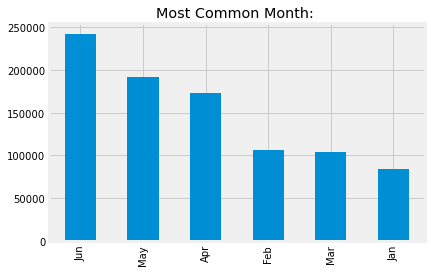

Most Common day:  2


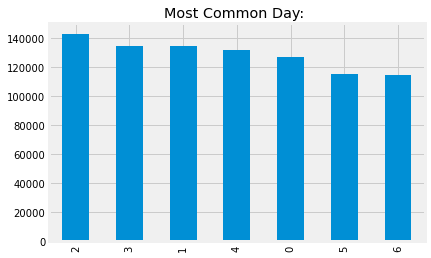

Most Common hour:  8


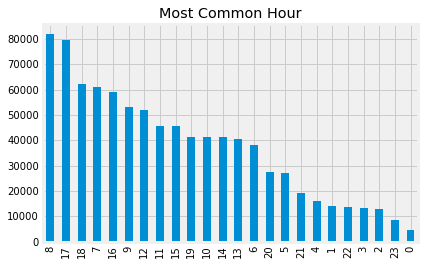


Calculating The Most Popular Stations and Trip...

Most Commonly Used Start Station:  Streeter Dr & Grand Ave
Most Commonly Used End Station:  Streeter Dr & Grand Ave
Most Frequent Combination of Start Station and End Station trip:  0    Lake Shore Dr & Monroe St-Streeter Dr & Grand Ave
dtype: object

This took 1.1887805461883545 seconds.
----------------------------------------

Calculating Trip Duration...

The Total Travel Time:  921961020.484
The Average Travel Time:  1024.4011338711268

This took 0.010443687438964844 seconds.
----------------------------------------

Calculating User Stats...

Count of User Type:  Subscriber    728824
Customer      170483
Dependent          1
Name: User Type, dtype: int64


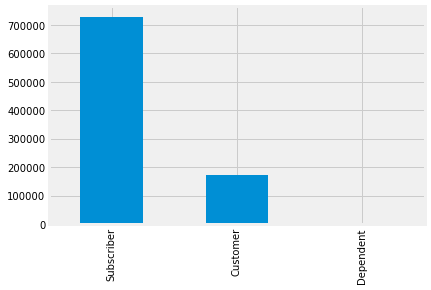

Count of Gender:  Male      385198
Female    124541
Name: Gender, dtype: int64


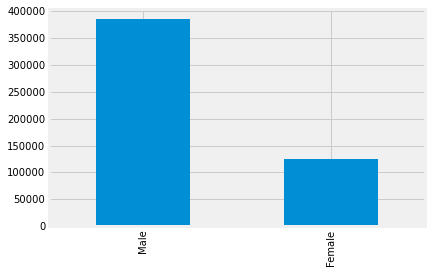

The Earlist Year: 1885.0 The Most Recent Year:  2016.0 most common year of birth:  1989.0 

This took 0.8767004013061523 seconds.
----------------------------------------


In [ ]:
def main():
    while True:
        city, month, day = get_filters()
        df = load_data(city, month, day)

        time_stats(df)
        station_stats(df)
        trip_duration_stats(df)
        user_stats(df)

        restart = input('\nWould you like to restart? Enter yes or no.\n')
        if restart.lower() != 'yes':
            break


if __name__ == "__main__":
    main()